# Классификация sms сообщений

In [7]:
%matplotlib inline
# служебная команда для отображения графиков

В этом задании мы будем использовать данные SMS Spam collection из репозитория UCI.
Файл с данными расположен [по ссылке](https://archive.ics.uci.edu/ml/machine-learning-databases/00228/), он уже скачан и разархивирован.

### 1. Загрузка, визуализация и предварительный анализ данных


Загрузим данные, используя модуль pandas:

In [8]:
import pandas as pd

In [9]:
data = pd.read_csv("sms.txt", sep="\t", header=None, names=["label", "sms"])

Посмотрим первые десять строк:

In [10]:
data.head(10)

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


В первом столбце хранятся метки (спам или не спам), во втором - текст сообщения.

Посмотрим, сколько всего объектов:

In [11]:
len(data)

5572

Посмотрим, сколько объектов каждого класса:

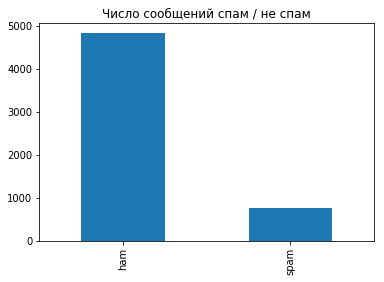

In [12]:
counts = data["label"].value_counts()
counts.plot(kind='bar', title="Число сообщений спам / не спам")

In [13]:
counts

ham     4825
spam     747
Name: label, dtype: int64

В выборке гораздо больше не-спама, чем спама.

### 2. Подготовка данных

В данных пока что нет выделенных признаков. Вспомним, что тексты можно превратить в "мешок слов". Для каждого объекта-текста мы получим столько признаков, сколько слов в словаре, и каждый признак содержит 1 (слово входит в текст) или 0 (слово не входит). Для этого в sklearn есть специальный инструмент:

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data["sms"])

Сколько получилось объектов и признаков?

In [18]:
X.shape

(5572, 8713)

А что в самой матрице?

In [19]:
X[:5].todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

Мы почти не видим единиц в этой матрице, потому что их очень мало.

А вот какие в текстах были слова:

In [20]:
vectorizer.vocabulary_

{'go': 3571,
 'until': 8084,
 'jurong': 4374,
 'point': 5958,
 'crazy': 2338,
 'available': 1316,
 'only': 5571,
 'in': 4114,
 'bugis': 1767,
 'great': 3655,
 'world': 8548,
 'la': 4501,
 'buffet': 1765,
 'cine': 2061,
 'there': 7694,
 'got': 3615,
 'amore': 1082,
 'wat': 8324,
 'ok': 5538,
 'lar': 4537,
 'joking': 4342,
 'wif': 8450,
 'oni': 5567,
 'free': 3373,
 'entry': 2963,
 'wkly': 8506,
 'comp': 2178,
 'to': 7806,
 'win': 8463,
 'fa': 3100,
 'cup': 2398,
 'final': 3221,
 'tkts': 7793,
 '21st': 412,
 'may': 4959,
 '2005': 403,
 'text': 7644,
 '87121': 794,
 'receive': 6340,
 'question': 6232,
 'std': 7279,
 'txt': 7986,
 'rate': 6284,
 'apply': 1169,
 '08452810075over18': 77,
 'dun': 2815,
 'say': 6679,
 'so': 7074,
 'early': 2836,
 'hor': 3952,
 'already': 1054,
 'then': 7688,
 'nah': 5270,
 'don': 2724,
 'think': 7709,
 'he': 3805,
 'goes': 3579,
 'usf': 8130,
 'lives': 4692,
 'around': 1220,
 'here': 3856,
 'though': 7729,
 'freemsg': 3380,
 'hey': 3866,
 'darling': 2455,
 'it

У нас есть еще одна небольшая проблем: классы обозначены не числами, а буквами. Перекодируем:

In [21]:
data["label"] = data["label"].map({"spam":1, "ham":0})

In [22]:
data["label"].head()

0    0
1    0
2    1
3    0
4    0
Name: label, dtype: int64

In [23]:
y = data["label"]

Теперь у нас есть X и y!

Разделим данные на обучение и контроль в пропорции 3:1:

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [26]:
X_train.shape

(4179, 8713)

### Обучение линейной модели

Обучим логистическую регрессию:

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Создадим таблицу весов и отсортируйте. Какие веса самые большие и какие самые маленькие?

In [30]:
# создаем список слов в том порядке, в котором они идут в X
words = pd.Series(vectorizer.vocabulary_).sort_values().index
words

Index(['00', '000', '000pes', '008704050406', '0089', '0121', '01223585236',
       '01223585334', '0125698789', '02',
       ...
       'zhong', 'zindgi', 'zoe', 'zogtorius', 'zoom', 'zouk', 'zyada', 'èn',
       'ú1', '〨ud'],
      dtype='object', length=8713)

In [31]:
weights_data = {"веса":model.coef_[0],\
                "признаки": words}
weights = pd.DataFrame(weights_data)
weights.sort_values("веса")

,веса,признаки
3684,-0.961891,gt
5254,-0.952287,my
4793,-0.912937,lt
4968,-0.902429,me
4696,-0.875865,ll
3436,-0.764335,fullonsms
3943,-0.738205,hope
7670,-0.735186,that
3805,-0.723501,he
6516,-0.687192,right


Можно ли сказать, что топ слова действительно характеризуют каждый из двух классов?

### Оценивание качества

Вычислим точность (accuracy):

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
preds_tr = model.predict(X_train)
preds_te = model.predict(X_test)

In [34]:
accuracy_score(y_train, preds_tr)

0.9976070830342187

In [35]:
accuracy_score(y_test, preds_te)

0.9813352476669059

Поскольку в данных класс 1 редкий, лучше использовать точность и полноту. Вычислим их:

In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [37]:
precision_score(y_test, preds_te)

0.9485714285714286

In [38]:
recall_score(y_test, preds_te)

0.907103825136612

Точность выше, чем полнота. Это означает, что почти все СМС, которые мы назвали спамовыми, действительно таковыми являются (высокая точность). Однако, мы находим не все спамовые сообщения (более низкая полнота).